In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict

from ch4_metrics import evaluate_classifier

In [2]:
# transfusion dataset from https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
transfusion_data = pd.read_csv('../data/transfusion.csv')
transfusion_data = transfusion_data.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'cc_of_blood_donated',
    'Time (months)': 'months_since_first_donation',
    'whether he/she donated blood in March 2007': 'donated_in_march_2007'
})

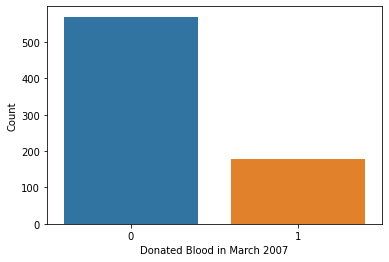

0    570
1    178
Name: donated_in_march_2007, dtype: int64


In [3]:
donated_in_march_countplot = sns.countplot(data=transfusion_data, x='donated_in_march_2007')
donated_in_march_countplot.set(ylabel='Count', xlabel='Donated Blood in March 2007')
plt.show()

print(transfusion_data['donated_in_march_2007'].value_counts())

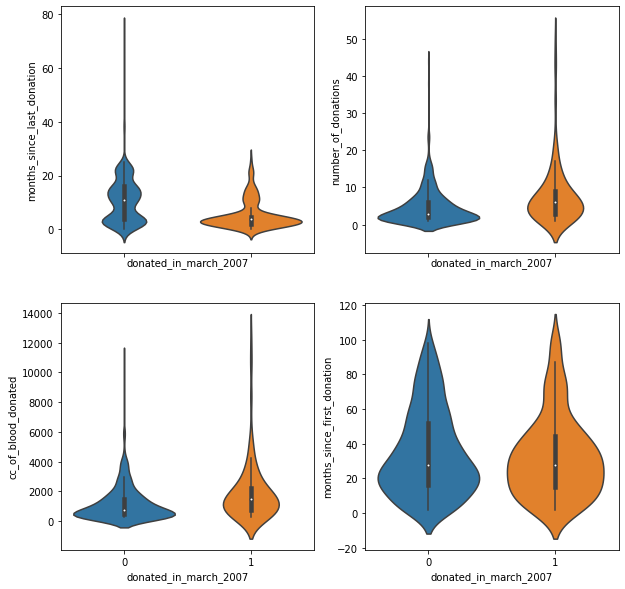

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True)
for column, axis in zip(transfusion_data.columns[:-1], axes.flatten()):
    sns.violinplot(data=transfusion_data, x='donated_in_march_2007', y=column, ax=axis)   
plt.show()

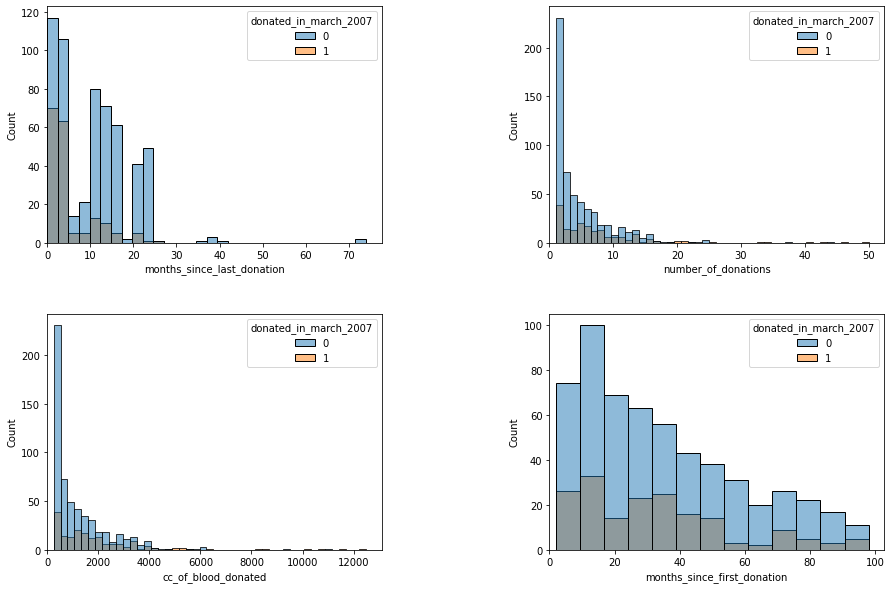

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for column, axis in zip(transfusion_data.columns[:-1], axes.flatten()):
    sns.histplot(data=transfusion_data, x=column, hue='donated_in_march_2007', ax=axis)
    axis.set_xlim((0, None))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

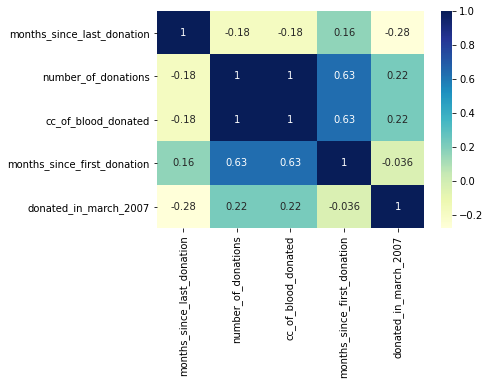

In [6]:
sns.heatmap(transfusion_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [7]:
X = transfusion_data.iloc[:, :-1].to_numpy()
y = transfusion_data.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

In [8]:
# full model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

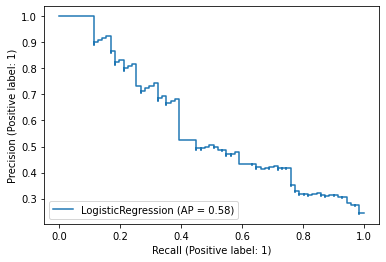

Accuracy: 0.7866666666666666
Null Accuracy:0.7633333333333333


Confusion Matrix:
[[228   1]
 [ 63   8]]

F1 Score: 0.2
Precision: 0.889
Recall: 0.113


array([[-1.07976938e-01,  1.69094098e-06,  4.22735245e-04,
        -2.03843501e-02]])

In [9]:
# evaluate model using train test split
plot_precision_recall_curve(classifier, X_test, y_test)
plt.show()

evaluate_classifier(X_test, y_test, classifier)

classifier.coef_

In [10]:
# evaluate full model using stratified 10 fold cross validation on the entire dataset
y_pred = cross_val_predict(classifier, X, y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       570
           1       0.55      0.16      0.24       178

    accuracy                           0.77       748
   macro avg       0.67      0.56      0.55       748
weighted avg       0.73      0.77      0.72       748



In [11]:
# recursive feature elimination
selector = RFECV(classifier, step=1, cv=3)
selector.fit(X_train, y_train)
print(selector.ranking_)
print(selector.support_)

[1 4 3 2]
[ True False False False]


In [12]:
# evaluate full model using stratified 10 fold cross validation on the test set
y_pred = cross_val_predict(classifier, X_test, y_test, cv=10)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       229
           1       0.76      0.23      0.35        71

    accuracy                           0.80       300
   macro avg       0.78      0.60      0.61       300
weighted avg       0.79      0.80      0.76       300



In [13]:
# evaluate reduced model using stratified 10 fold cross validation on the test set
X_test_reduced = selector.transform(X_test)

y_pred = cross_val_predict(classifier, X_test_reduced, y_test, cv=10)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       229
           1       0.00      0.00      0.00        71

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300



c:\users\yslin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\yslin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\yslin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo